In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
train=pd.read_csv('train.csv')
validation=pd.read_csv('validation.csv')
test=pd.read_csv('test.csv')

In [3]:
train.drop(['domain','userid','slotid', 'bidprice', 'payprice', 'url', 'urlid', 'creative', 'keypage', 'bidid'], axis=1, inplace=True)
validation.drop(['domain','userid','slotid', 'bidprice', 'payprice', 'url', 'urlid', 'creative', 'keypage', 'bidid'], axis=1, inplace=True)
test.drop(['domain','slotid', 'userid','urlid', 'creative', 'keypage', 'bidid', 'url'], axis=1, inplace=True)

## Convert string columns to int , -1 for Na or null values

In [4]:
dict_adexchange = {'1':1, '2':2, '3':3, '4':4, 'null':-1}
dict_visi = {'0':0, '1':1, '2':2, '255':255, 'FifthView': 5, 'FirstView': 1, 
             'FourthView': 4, 'Na':-1, 'OtherView':6, 'SecondView':2, 'ThirdView': 3}
dict_format = {'0':0, '1':1, '5':5, 'Na':-1}
dict_useragent = {'android_chrome':0,'android_firefox':1,'android_ie':2,'android_maxthon':3,'android_opera':4,
                  'android_other':5,'android_safari':6,'android_sogou':7,'ios_other':8,'ios_safari':9,'linux_chrome':10,
                  'linux_firefox':11,'linux_ie':12,'linux_opera':13,'linux_other':14,'linux_safari':15,'mac_chrome':16,'mac_firefox':17,
                  'mac_maxthon':18,'mac_opera':19,'mac_other':20,'mac_safari':21,'mac_sogou':21,'other_chrome':22,'other_firefox':23,'other_ie':24,
                  'other_opera':25,'other_other':26,'other_safari':27,'windows_chrome':28,'windows_firefox':29,'windows_ie':30,'windows_maxthon':31,
                  'windows_opera':31,'windows_other':32,'windows_safari':33,'windows_sogou':34, 'windows_theworld':35}
train1 = train.replace({'adexchange': dict_adexchange, 'slotvisibility': dict_visi, 'slotformat':dict_format, 'useragent':dict_useragent})
validation1 = validation.replace({'adexchange': dict_adexchange, 'slotvisibility': dict_visi, 'slotformat':dict_format, 'useragent':dict_useragent})
test1 = test.replace({'adexchange': dict_adexchange, 'slotvisibility': dict_visi, 'slotformat':dict_format, 'useragent':dict_useragent})


In [5]:
my_df=pd.concat([train1,validation1], axis=0)

In [6]:
tag_dict={}
clicks=my_df[my_df['click']==1]
tags=clicks['usertag']
for tag in tags:
    if tag=='null':
        try:
             tag_dict['null']+=1
        except:
             tag_dict['null']=1
    else:
        tag=tag.split(',')
        for i in tag:
            try:
                tag_dict[i]+=1
            except:
                tag_dict[i]=1

CTR_for_tags_train=[]
tags=train1['usertag']
for tag in tags:
    if tag=='null':
        CTR_for_tags_train.append(int((tag_dict['null']/float(len(clicks)))*100))
    else:
        tag = tag.split(',')
        sum_tags=0
        for i in tag:
            if i in tag_dict.keys():
                sum_tags+=(tag_dict[i]/float(len(clicks)))*100
        CTR_for_tags_train.append(int(sum_tags))
        
CTR_for_tags_validation=[]
tags=validation1['usertag']
for tag in tags:
    if tag=='null':
        CTR_for_tags_validation.append(int((tag_dict['null']/float(len(clicks)))*100))
    else:
        tag = tag.split(',')
        sum_tags=0
        for i in tag:
            if i in tag_dict.keys():
                sum_tags+=(tag_dict[i]/float(len(clicks)))*100
        CTR_for_tags_validation.append(int(sum_tags))
CTR_for_tags_test=[]
tags=test['usertag']
for tag in tags:
    if tag=='null':
        CTR_for_tags_test.append(int((tag_dict['null']/float(len(clicks)))*100))
    else:
        tag = tag.split(',')
        sum_tags=0
        for i in tag:
            if i in tag_dict.keys():
                sum_tags+=(tag_dict[i]/float(len(clicks)))*100
        CTR_for_tags_test.append(int(sum_tags))
test1['tags_CTR'] = list(CTR_for_tags_test)
train1['tags_CTR'] = list(CTR_for_tags_train)
validation1['tags_CTR'] = list(CTR_for_tags_validation)

## Frequency for tags in all dataset (train or validation)

In [7]:
tag_dict={}
tags=my_df['usertag']
for tag in tags:
    if tag=='null':
        try:
             tag_dict['null']+=1
        except:
             tag_dict['null']=1
    else:
        tag=tag.split(',')
        for i in tag:
            try:
                tag_dict[i]+=1
            except:
                tag_dict[i]=1
freq_for_tags_train=[]
tags=train1['usertag']
for tag in tags:
    if tag=='null':
        freq_for_tags_train.append(tag_dict['null'])
    else:
        tag = tag.split(',')
        sum_tags=0
        for i in tag:
            if i in tag_dict.keys():
                sum_tags+=tag_dict[i]
        freq_for_tags_train.append(sum_tags)
        
freq_for_tags_validation=[]
tags=validation1['usertag']
for tag in tags:
    if tag=='null':
        freq_for_tags_validation.append(tag_dict['null'])
    else:
        tag = tag.split(',')
        sum_tags=0
        for i in tag:
            if i in tag_dict.keys():
                sum_tags+=tag_dict[i]
        freq_for_tags_validation.append(sum_tags)

freq_for_tags_test=[]
tags=test1['usertag']
for tag in tags:
    if tag=='null':
        freq_for_tags_test.append(tag_dict['null'])
    else:
        tag = tag.split(',')
        sum_tags=0
        for i in tag:
            if i in tag_dict.keys():
                sum_tags+=tag_dict[i]
        freq_for_tags_test.append(sum_tags)
train1['tags_freq'] = list(freq_for_tags_train)
validation1['tags_freq'] = list(freq_for_tags_validation)
test1['tags_freq'] = list(freq_for_tags_test)

In [8]:
tags=train1['usertag']
count_tag=[]
for tag in tags:
    if tag!='null':
        tag=tag.split(',')
        count_tag.append(len(tag))
    else:
        count_tag.append(0)
train1['count_tags'] = list(count_tag)

tags=validation1['usertag']
count_tag=[]
for tag in tags:
    if tag!='null':
        tag=tag.split(',')
        count_tag.append(len(tag))
    else:
        count_tag.append(0)
validation1['count_tags'] = list(count_tag)

tags=test1['usertag']
count_tag=[]
for tag in tags:
    if tag!='null':
        tag=tag.split(',')
        count_tag.append(len(tag))
    else:
        count_tag.append(0)
test1['count_tags'] = list(count_tag)

    

In [18]:
train1.head(4)

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,slotformat,slotprice,advertiser,usertag,tags_CTR,tags_freq,count_tags
0,0,5,22,30,2,2,2,200,200,2,0,5,3427,null,28,497479,0
1,0,1,20,28,238,239,1,300,250,4,-1,0,2821,null,28,497479,0
2,0,3,13,30,40,41,2,250,250,2,0,5,3427,"10052,10006,13866,10110",101,3132933,4
3,0,6,23,30,1,1,1,160,600,2,1,0,1458,"13866,10063,10111",85,2362337,3


## Frequency and CTR for each feature

In [57]:
for column in ['city']:    
    column_freq={}
    column_CTR ={}
    set_columns=set(train[column])
    for col in set_columns:
        #freq=train[train[column]==col]
        #column_freq[col] = len(freq)
        column_CTR [col] = int((len(train[(train[column]==col) & (train['click']==1)])/(float(len(freq))))*10000)
    #train1[column+'_freq'] = train1[column].map(column_freq)
    train1[column+'_CTR'] = train1[column].map(column_CTR)
    #validation1[column+'_freq'] = validation1[column].map(column_freq)
    validation1[column+'_CTR'] = validation1[column].map(column_CTR)

In [42]:
train1.head(5)

,click,weekday,hour,useragent,region,city,adexchange,slotwidth,slotheight,slotvisibility,...,region_CTR,city_freq,city_CTR,hour_freq,hour_CTR,weekday_freq,weekday_CTR,useragent_freq,useragent_CTR,usertag_int
0,0,5,22,30,2,2,2,200,200,2,...,7,click weekday hour useragent ...,7,click weekday hour useragent ...,8,click weekday hour useragent ...,7,NaN,NaN,-1614662757
1,0,1,20,28,238,239,1,300,250,4,...,8,click weekday hour useragent ...,8,click weekday hour useragent ...,7,click weekday hour useragent ...,6,NaN,NaN,-1614662757
2,0,3,13,30,40,41,2,250,250,2,...,5,click weekday hour useragen...,10,click weekday hour useragent...,8,click weekday hour useragent ...,8,NaN,NaN,1160895987
3,0,6,23,30,1,1,1,160,600,2,...,8,click weekday hour useragent ...,8,click weekday hour useragent...,8,click weekday hour useragent ...,5,NaN,NaN,1974971667
4,0,5,6,30,216,233,2,728,90,6,...,5,click weekday hour useragen...,4,click weekday hour useragent ...,2,click weekday hour useragent ...,7,NaN,NaN,-1614662757


In [6]:
train=pd.get_dummies(train, columns=['slotheight','useragent', 'adexchange', 'slotformat', 'slotvisibility'])
validation=pd.get_dummies(validation, columns=['slotheight','useragent', 'adexchange', 'slotformat', 'slotvisibility'])

Text(0.5,1,'Number of clicks by hour')

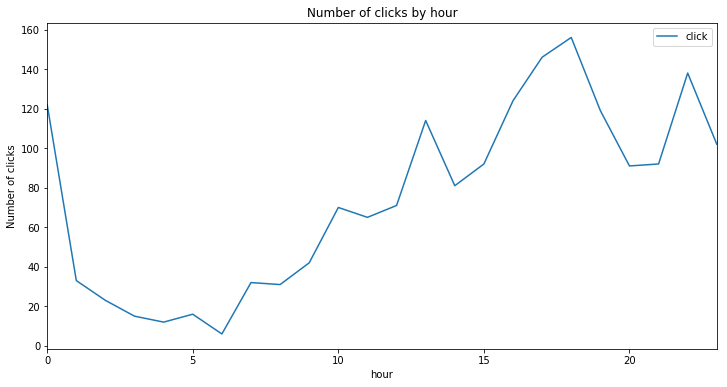

In [13]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour')

Text(0.5,1,'Hourly impressions vs. clicks')

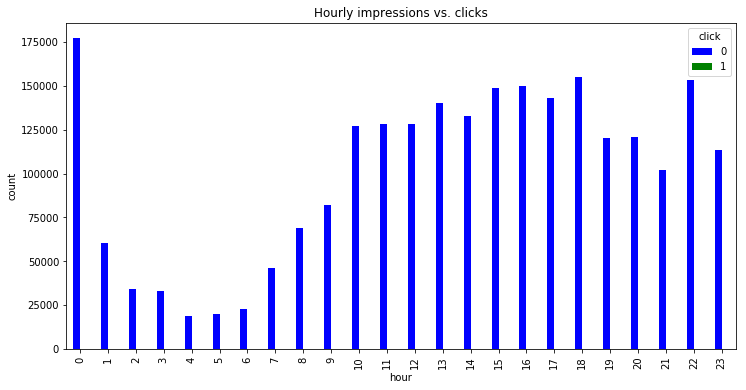

In [18]:
train.groupby(['hour', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('count')
plt.title('Hourly impressions vs. clicks')

Text(0.5,1,'Hourly CTR')

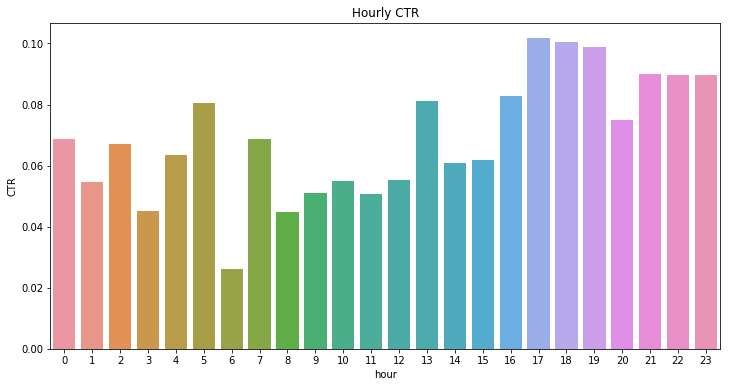

In [108]:
import seaborn as sns
df_click = train[train['click'] == 1]
df_hour = train[['hour','click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour','click']].groupby(['hour']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR')

Text(0.5,1,'City CTR')

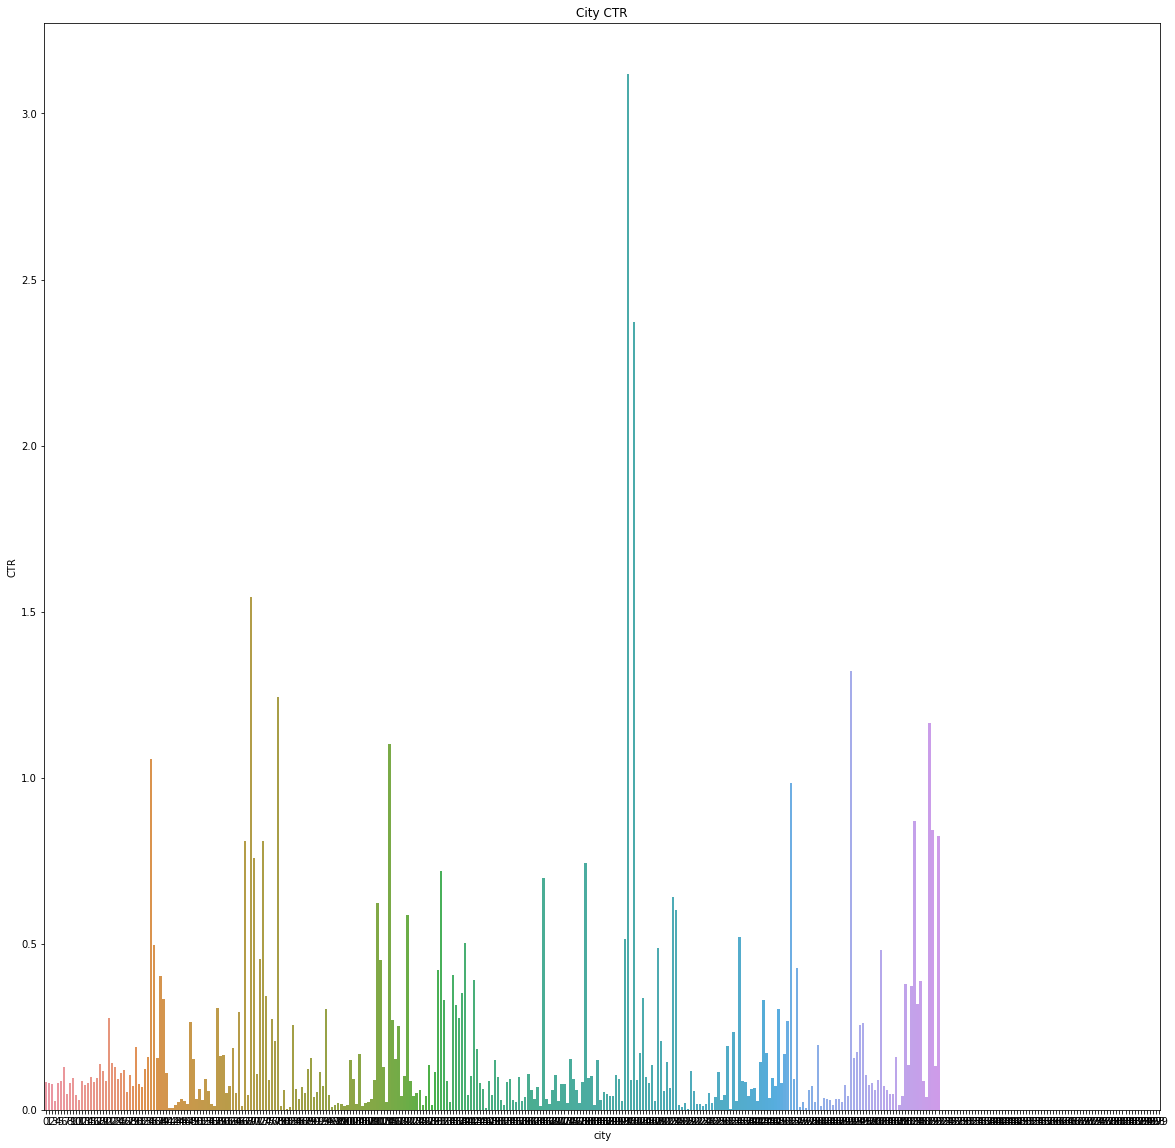

In [203]:
df_click = train[train['click'] == 1]
df_city = train[['city','click']].groupby(['city']).count().reset_index()
df_city = df_city.rename(columns={'click': 'impressions'})
df_city['clicks'] = df_click[['city','click']].groupby(['city']).count().reset_index()['click']
df_city['CTR'] = df_city['clicks']/df_city['impressions']*100
plt.figure(figsize=(20,20))
sns.barplot(y='CTR', x='city', data=df_city)
plt.title('City CTR')

In [202]:
len(set(train['region']))

35

Text(0.5,1,'Region CTR')

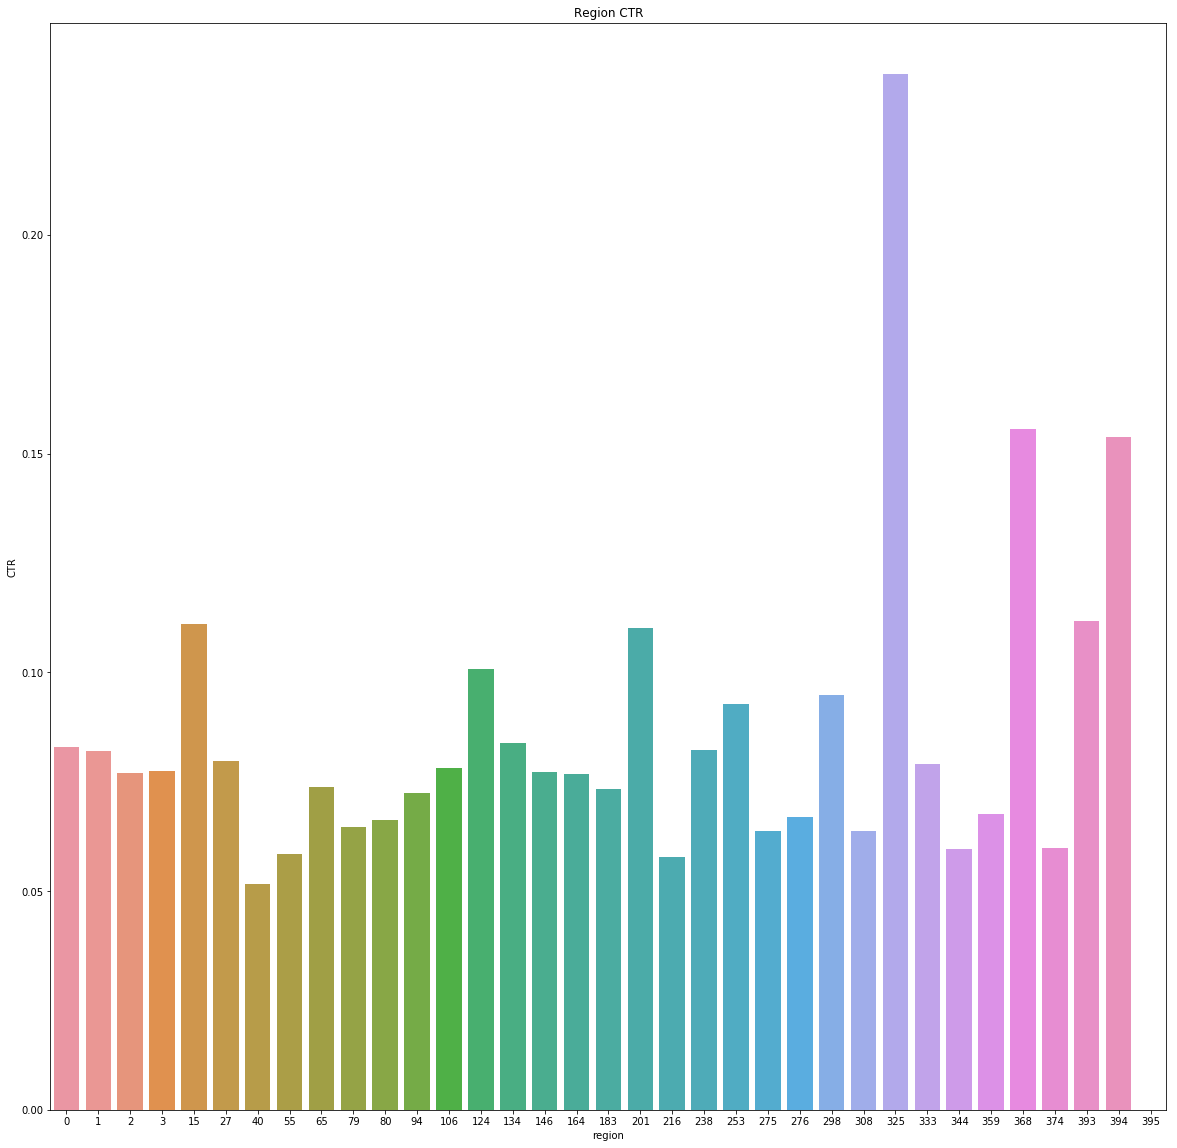

In [205]:
df_click = train[train['click'] == 1]
df_region = train[['region','click']].groupby(['region']).count().reset_index()
df_region = df_region.rename(columns={'click': 'impressions'})
df_region['clicks'] = df_click[['region','click']].groupby(['region']).count().reset_index()['click']
df_region['CTR'] = df_region['clicks']/df_region['impressions']*100
plt.figure(figsize=(20,20))
sns.barplot(y='CTR', x='region', data=df_region)
plt.title('Region CTR')

In [9]:
def convert_obj_to_int(self):
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train1 = convert_obj_to_int(train1)
validation1 = convert_obj_to_int(validation1)
test1 = convert_obj_to_int(test1)

In [10]:
import lightgbm as lgb
x_train = train1.loc[:, train1.columns != 'click']
y_train = train1.click.values
x_test  = validation1.loc[:, validation1.columns!='click']
y_test  = validation1.click.values

In [16]:
categorical=['hour', 'weekday', 'slotheight', 'useragent', 'adexchange', 'slotvisibility']

In [13]:
lgb_train = lgb.Dataset(x_train, label=y_train)
lgb_eval = lgb.Dataset(x_test, label = y_test)

In [14]:
# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbrt',
    'objective': 'binary',
    'metric': { 'binary_logloss', 'auc'},
    'num_leaves': 32, # defauly leaves(31) amount for each tree
    'learning_rate': 0.01,
    'feature_fraction': 0.9, # will select 90% features before training each tree
    'bagging_fraction': 0.7, #feature_fraction, but this will random select part of data
    'bagging_freq': 5, #  perform bagging at every 1 iteration
    'verbose': 0,
    'max_depth':5,
    'min_data_in_leaf':100,
    'num_iterations':2000,
    'max_bin':500
}

print('Start training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=4000,
                valid_sets=lgb_eval,
                early_stopping_rounds=200)

Start training...


c:\python27\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's auc: 0.694071	valid_0's binary_logloss: 0.00549931
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's auc: 0.699175	valid_0's binary_logloss: 0.00548619
[3]	valid_0's auc: 0.699213	valid_0's binary_logloss: 0.00547351
[4]	valid_0's auc: 0.72953	valid_0's binary_logloss: 0.00546283
[5]	valid_0's auc: 0.723489	valid_0's binary_logloss: 0.00545086
[6]	valid_0's auc: 0.725457	valid_0's binary_logloss: 0.00544225
[7]	valid_0's auc: 0.722089	valid_0's binary_logloss: 0.00543753
[8]	valid_0's auc: 0.730713	valid_0's binary_logloss: 0.00542911
[9]	valid_0's auc: 0.729699	valid_0's binary_logloss: 0.00542238
[10]	valid_0's auc: 0.727716	valid_0's binary_logloss: 0.005416
[11]	valid_0's auc: 0.731013	valid_0's binary_logloss: 0.00541055
[12]	valid_0's auc: 0.73304	valid_0's binary_logloss: 0.00540383
[13]	valid_0's auc: 0.733565	valid_0's binary_logloss: 0.00539774
[14]	valid_0's auc: 0.733788	valid_0's binary_logloss: 0.00539041
[15]	valid_0's auc: 0.7367

[125]	valid_0's auc: 0.803683	valid_0's binary_logloss: 0.00498359
[126]	valid_0's auc: 0.803914	valid_0's binary_logloss: 0.00498144
[127]	valid_0's auc: 0.80417	valid_0's binary_logloss: 0.0049807
[128]	valid_0's auc: 0.804237	valid_0's binary_logloss: 0.00497965
[129]	valid_0's auc: 0.804405	valid_0's binary_logloss: 0.00497925
[130]	valid_0's auc: 0.804427	valid_0's binary_logloss: 0.00497825
[131]	valid_0's auc: 0.804781	valid_0's binary_logloss: 0.00497764
[132]	valid_0's auc: 0.805232	valid_0's binary_logloss: 0.00497709
[133]	valid_0's auc: 0.804928	valid_0's binary_logloss: 0.00497633
[134]	valid_0's auc: 0.804936	valid_0's binary_logloss: 0.00497585
[135]	valid_0's auc: 0.805169	valid_0's binary_logloss: 0.00497462
[136]	valid_0's auc: 0.804989	valid_0's binary_logloss: 0.00497385
[137]	valid_0's auc: 0.804949	valid_0's binary_logloss: 0.00497295
[138]	valid_0's auc: 0.804969	valid_0's binary_logloss: 0.0049726
[139]	valid_0's auc: 0.804653	valid_0's binary_logloss: 0.004972


[248]	valid_0's auc: 0.826416	valid_0's binary_logloss: 0.00476659
[249]	valid_0's auc: 0.826428	valid_0's binary_logloss: 0.00476653
[250]	valid_0's auc: 0.826519	valid_0's binary_logloss: 0.00476645
[251]	valid_0's auc: 0.826491	valid_0's binary_logloss: 0.00476649
[252]	valid_0's auc: 0.826873	valid_0's binary_logloss: 0.00476374
[253]	valid_0's auc: 0.827343	valid_0's binary_logloss: 0.00476094
[254]	valid_0's auc: 0.827799	valid_0's binary_logloss: 0.0047583
[255]	valid_0's auc: 0.828182	valid_0's binary_logloss: 0.00475576
[256]	valid_0's auc: 0.828283	valid_0's binary_logloss: 0.00475433
[257]	valid_0's auc: 0.828394	valid_0's binary_logloss: 0.00475318
[258]	valid_0's auc: 0.828845	valid_0's binary_logloss: 0.00475205
[259]	valid_0's auc: 0.829212	valid_0's binary_logloss: 0.00475096
[260]	valid_0's auc: 0.829849	valid_0's binary_logloss: 0.00474976
[261]	valid_0's auc: 0.829842	valid_0's binary_logloss: 0.00474931
[262]	valid_0's auc: 0.829772	valid_0's binary_logloss: 0.00474

[371]	valid_0's auc: 0.836048	valid_0's binary_logloss: 0.00466868
[372]	valid_0's auc: 0.836119	valid_0's binary_logloss: 0.00466842
[373]	valid_0's auc: 0.836057	valid_0's binary_logloss: 0.00466835
[374]	valid_0's auc: 0.836092	valid_0's binary_logloss: 0.00466809
[375]	valid_0's auc: 0.836238	valid_0's binary_logloss: 0.00466786
[376]	valid_0's auc: 0.836265	valid_0's binary_logloss: 0.00466772
[377]	valid_0's auc: 0.836328	valid_0's binary_logloss: 0.00466758
[378]	valid_0's auc: 0.836379	valid_0's binary_logloss: 0.00466744
[379]	valid_0's auc: 0.836443	valid_0's binary_logloss: 0.00466728
[380]	valid_0's auc: 0.836431	valid_0's binary_logloss: 0.00466699
[381]	valid_0's auc: 0.836538	valid_0's binary_logloss: 0.00466699
[382]	valid_0's auc: 0.837123	valid_0's binary_logloss: 0.00466671
[383]	valid_0's auc: 0.837139	valid_0's binary_logloss: 0.00466676
[384]	valid_0's auc: 0.83718	valid_0's binary_logloss: 0.00466664
[385]	valid_0's auc: 0.837136	valid_0's binary_logloss: 0.00466

[494]	valid_0's auc: 0.840014	valid_0's binary_logloss: 0.00462689
[495]	valid_0's auc: 0.839976	valid_0's binary_logloss: 0.00462701
[496]	valid_0's auc: 0.83987	valid_0's binary_logloss: 0.00462688
[497]	valid_0's auc: 0.839726	valid_0's binary_logloss: 0.00462697
[498]	valid_0's auc: 0.839614	valid_0's binary_logloss: 0.00462706
[499]	valid_0's auc: 0.839514	valid_0's binary_logloss: 0.00462712
[500]	valid_0's auc: 0.839388	valid_0's binary_logloss: 0.00462724
[501]	valid_0's auc: 0.839525	valid_0's binary_logloss: 0.00462624
[502]	valid_0's auc: 0.839444	valid_0's binary_logloss: 0.00462617
[503]	valid_0's auc: 0.83955	valid_0's binary_logloss: 0.00462509
[504]	valid_0's auc: 0.839476	valid_0's binary_logloss: 0.00462479
[505]	valid_0's auc: 0.839474	valid_0's binary_logloss: 0.00462393
[506]	valid_0's auc: 0.839887	valid_0's binary_logloss: 0.00462304
[507]	valid_0's auc: 0.840253	valid_0's binary_logloss: 0.00462261
[508]	valid_0's auc: 0.840548	valid_0's binary_logloss: 0.004621

[617]	valid_0's auc: 0.842635	valid_0's binary_logloss: 0.00458649
[618]	valid_0's auc: 0.842613	valid_0's binary_logloss: 0.00458607
[619]	valid_0's auc: 0.842642	valid_0's binary_logloss: 0.00458539
[620]	valid_0's auc: 0.842636	valid_0's binary_logloss: 0.00458479
[621]	valid_0's auc: 0.842595	valid_0's binary_logloss: 0.00458479
[622]	valid_0's auc: 0.842488	valid_0's binary_logloss: 0.00458484
[623]	valid_0's auc: 0.842555	valid_0's binary_logloss: 0.00458478
[624]	valid_0's auc: 0.842622	valid_0's binary_logloss: 0.00458479
[625]	valid_0's auc: 0.842668	valid_0's binary_logloss: 0.00458458
[626]	valid_0's auc: 0.842666	valid_0's binary_logloss: 0.00458446
[627]	valid_0's auc: 0.842699	valid_0's binary_logloss: 0.00458438
[628]	valid_0's auc: 0.842621	valid_0's binary_logloss: 0.00458443
[629]	valid_0's auc: 0.84271	valid_0's binary_logloss: 0.00458438
[630]	valid_0's auc: 0.84281	valid_0's binary_logloss: 0.00458429
[631]	valid_0's auc: 0.842867	valid_0's binary_logloss: 0.004584

[740]	valid_0's auc: 0.84172	valid_0's binary_logloss: 0.0045679
[741]	valid_0's auc: 0.841739	valid_0's binary_logloss: 0.00456781
[742]	valid_0's auc: 0.841728	valid_0's binary_logloss: 0.00456767
[743]	valid_0's auc: 0.841712	valid_0's binary_logloss: 0.00456764
[744]	valid_0's auc: 0.841675	valid_0's binary_logloss: 0.00456763
[745]	valid_0's auc: 0.841677	valid_0's binary_logloss: 0.00456747
[746]	valid_0's auc: 0.841672	valid_0's binary_logloss: 0.00456752
[747]	valid_0's auc: 0.84164	valid_0's binary_logloss: 0.00456758
[748]	valid_0's auc: 0.841597	valid_0's binary_logloss: 0.00456765
[749]	valid_0's auc: 0.841594	valid_0's binary_logloss: 0.0045677
[750]	valid_0's auc: 0.841551	valid_0's binary_logloss: 0.00456782
[751]	valid_0's auc: 0.841701	valid_0's binary_logloss: 0.00456712
[752]	valid_0's auc: 0.84176	valid_0's binary_logloss: 0.00456659
[753]	valid_0's auc: 0.841799	valid_0's binary_logloss: 0.00456611
[754]	valid_0's auc: 0.841835	valid_0's binary_logloss: 0.00456576


[863]	valid_0's auc: 0.845252	valid_0's binary_logloss: 0.00454211
[864]	valid_0's auc: 0.845267	valid_0's binary_logloss: 0.00454156
[865]	valid_0's auc: 0.845218	valid_0's binary_logloss: 0.00454139
[866]	valid_0's auc: 0.845264	valid_0's binary_logloss: 0.00454086
[867]	valid_0's auc: 0.845243	valid_0's binary_logloss: 0.00454007
[868]	valid_0's auc: 0.845239	valid_0's binary_logloss: 0.0045399
[869]	valid_0's auc: 0.845226	valid_0's binary_logloss: 0.00453996
[870]	valid_0's auc: 0.845248	valid_0's binary_logloss: 0.00453979
[871]	valid_0's auc: 0.845193	valid_0's binary_logloss: 0.00453995
[872]	valid_0's auc: 0.845271	valid_0's binary_logloss: 0.00453954
[873]	valid_0's auc: 0.845204	valid_0's binary_logloss: 0.0045397
[874]	valid_0's auc: 0.845231	valid_0's binary_logloss: 0.00453937
[875]	valid_0's auc: 0.845339	valid_0's binary_logloss: 0.00453914
[876]	valid_0's auc: 0.845314	valid_0's binary_logloss: 0.00453915
[877]	valid_0's auc: 0.845307	valid_0's binary_logloss: 0.004539

[986]	valid_0's auc: 0.844523	valid_0's binary_logloss: 0.00452866
[987]	valid_0's auc: 0.84465	valid_0's binary_logloss: 0.0045284
[988]	valid_0's auc: 0.844761	valid_0's binary_logloss: 0.00452827
[989]	valid_0's auc: 0.844824	valid_0's binary_logloss: 0.00452817
[990]	valid_0's auc: 0.844902	valid_0's binary_logloss: 0.00452801
[991]	valid_0's auc: 0.844796	valid_0's binary_logloss: 0.00452808
[992]	valid_0's auc: 0.844704	valid_0's binary_logloss: 0.0045282
[993]	valid_0's auc: 0.844678	valid_0's binary_logloss: 0.00452826
[994]	valid_0's auc: 0.844593	valid_0's binary_logloss: 0.00452834
[995]	valid_0's auc: 0.844501	valid_0's binary_logloss: 0.00452833
[996]	valid_0's auc: 0.844503	valid_0's binary_logloss: 0.00452834
[997]	valid_0's auc: 0.844468	valid_0's binary_logloss: 0.00452838
[998]	valid_0's auc: 0.844416	valid_0's binary_logloss: 0.0045286
[999]	valid_0's auc: 0.844357	valid_0's binary_logloss: 0.00452873
[1000]	valid_0's auc: 0.844357	valid_0's binary_logloss: 0.0045288

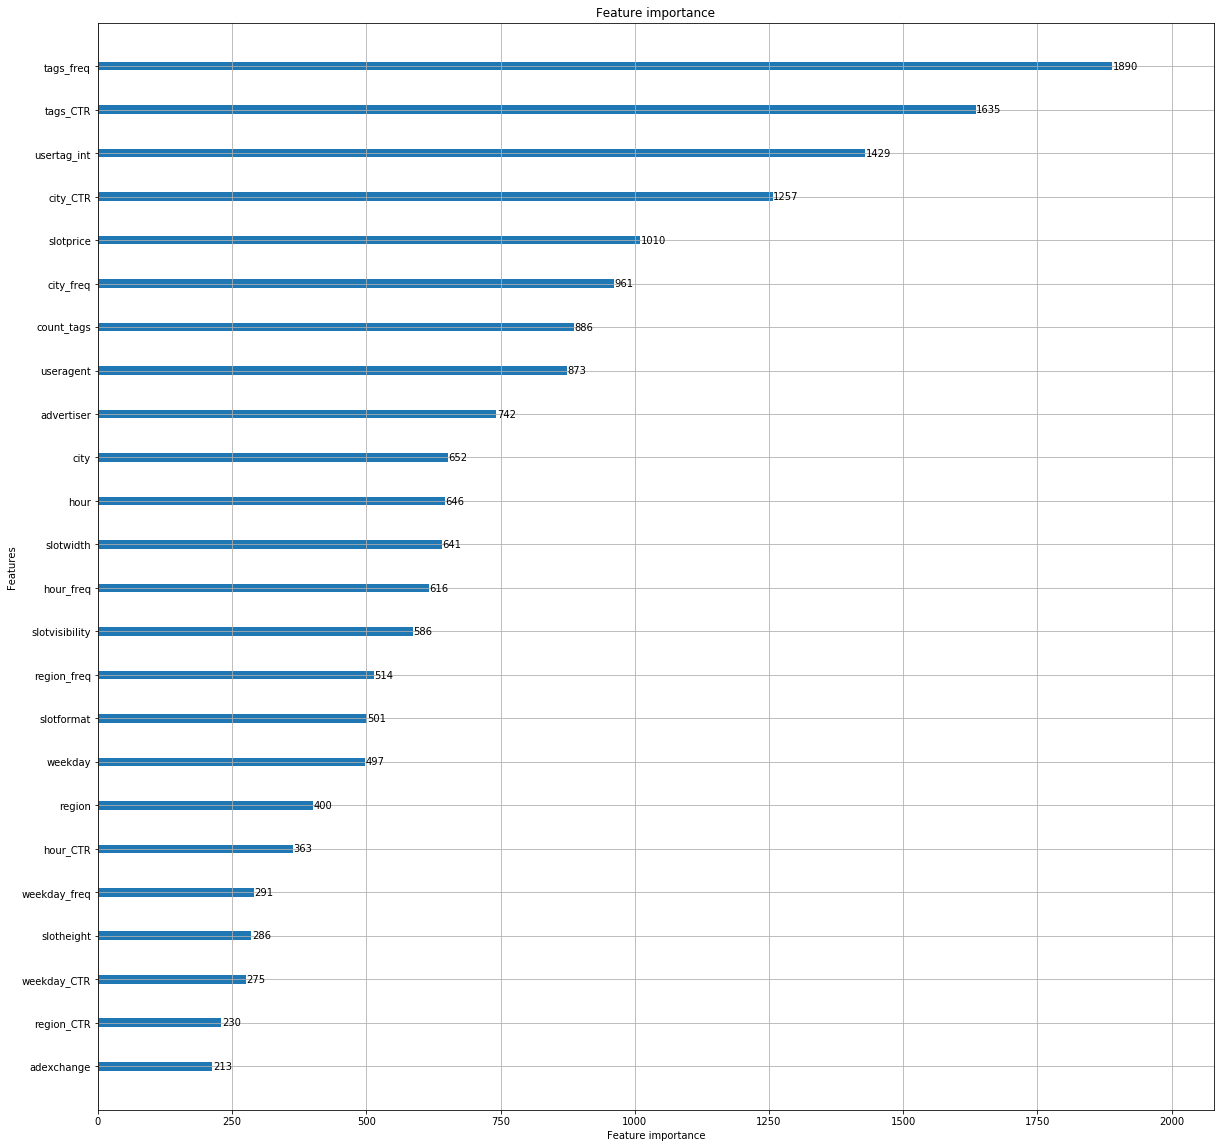

In [52]:
lgb.plot_importance(gbm, figsize=(20,20))

In [94]:
#Prediction
y_pred=gbm.predict(x_test)
#convert into binary values
for i in range(0,len(y_pred)):
        
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)


In [15]:
#train
#y_pred_train=gbm.predict(x_train)
# validation
y_pred_valid=gbm.predict(x_test)
#test
y_pred_test = gbm.predict(test1)

In [17]:
df=pd.DataFrame()
df['test_pred'] = y_pred_valid
df.to_csv('test_valid1.csv')

In [18]:
y_pred_valid.max()

0.6755106364228874

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [97]:
cm

array([[303723,      0],
       [   200,      2]], dtype=int64)

In [98]:
print accuracy

0.9993419429135477


In [50]:
1-validation['click'].mean()

0.9992624376743381

In [51]:
1-train['click'].mean()

0.9992624376743381